In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import Data

In [2]:
data = pd.read_csv("medical_insurance.csv", index_col = 'National Provider Identifier')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
National Provider Identifier,,,,,,,,,,,,,,,,,,,,,
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497892 entries, 1003000126 to 1861590176
Data columns (total 25 columns):
Last Name/Organization Name of the Provider                 object
First Name of the Provider                                  object
Middle Initial of the Provider                              object
Credentials of the Provider                                 object
Gender of the Provider                                      object
Entity Type of the Provider                                 object
Street Address 1 of the Provider                            object
Street Address 2 of the Provider                            object
City of the Provider                                        object
Zip Code of the Provider                                    object
State Code of the Provider                                  object
Country Code of the Provider                                object
Provider Type                                               object
Medi

### Subset Data to only California State

In [19]:
data_ca = data.loc[data['State Code of the Provider']=='CA']

### Visualize missing value

In [20]:
data_ca.isnull().sum()

Last Name/Organization Name of the Provider                     27
First Name of the Provider                                   40497
Middle Initial of the Provider                              250116
Credentials of the Provider                                  54201
Gender of the Provider                                       40464
Entity Type of the Provider                                      0
Street Address 1 of the Provider                                 0
Street Address 2 of the Provider                            348746
City of the Provider                                             0
Zip Code of the Provider                                         0
State Code of the Provider                                       0
Country Code of the Provider                                     0
Provider Type                                                    0
Medicare Participation Indicator                                 0
Place of Service                                              

####  Gender of the Provider

In [21]:
print (data_ca['Gender of the Provider'].describe())

count     691100
unique         2
top            M
freq      515106
Name: Gender of the Provider, dtype: object


we can see that gender in male acounts for almost 74% of the data. It can be inferred from the fact that generally there are more male physicians (provider) than female physicians. The missing value in column "Last Name/Organization Name of the Provider" and "Gender of the Provider" account for less than 20% of the data, let's ignore the rows that missing with gender first.

In [22]:
data_ca_drop = data_ca[pd.notnull(data_ca['Gender of the Provider'])]

In [23]:
# I will drop those features that I am not interested to look into
data_ca_drop = data_ca_drop.drop(['Last Name/Organization Name of the Provider','Middle Initial of the Provider', 'First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)

In [24]:
data_ca_drop.isnull().sum()

Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average 

Now we don't have any missing value in the dataframe, let's look at more details in this data. First, let's create a column to show the difference between "Avergae submitted Charged Amount" and "Average Medicare Allowed Amount". We would like to see what features would influence the difference bewteen medicare allowed amount and average submitted charge amount. This feature will be our target variable. 

In [25]:
data_ca_drop['Average Medicare Difference'] = data_ca_drop['Average Submitted Charge Amount']- data_ca_drop['Average Medicare Allowed Amount'] 

In [26]:
df_provider = data_ca_drop.groupby('Provider Type')['Average Medicare Difference'].mean().sort_values(ascending = False)
df_provider

Provider Type
Thoracic Surgery                               1192.946294
Neurosurgery                                   1149.126776
Cardiac Surgery                                1146.053486
Vascular Surgery                               1042.064660
CRNA                                            882.815789
Surgical Oncology                               831.411465
Anesthesiology                                  774.339187
Oral Surgery (dentists only)                    668.012523
Interventional Radiology                        610.715219
Radiation Oncology                              550.456707
General Surgery                                 530.237879
Orthopedic Surgery                              502.240653
Gynecological/Oncology                          455.367475
Sleep Medicine                                  439.615390
Gastroenterology                                415.319883
Sports Medicine                                 396.012203
Interventional Cardiology                 

We can see that only four providers have average medicare difference exceed $1000. We will focus in these four groups first.

In [27]:
data_pro_sub = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(list(df_provider.head(4).index))]
Y = data_pro_sub['Average Medicare Difference']
X = data_pro_sub.drop(['Average Medicare Difference'], axis = 1)

## Feature Exploration 

### Correlation Matrix

In [28]:
data_pro_sub.corr()

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Average Medicare Difference
Number of Services,1.000000,0.335629,0.364224,-0.031486,-0.041591,-0.031597,-0.034286,-0.042009
Number of Medicare Beneficiaries,0.335629,1.000000,0.918180,-0.057655,-0.080469,-0.058113,-0.063210,-0.082562
Number of Distinct Medicare Beneficiary/Per Day Services,0.364224,0.918180,1.000000,-0.058485,-0.083358,-0.058874,-0.064489,-0.086014
Average Medicare Allowed Amount,-0.031486,-0.057655,-0.058485,1.000000,0.840891,0.999668,0.996223,0.706479
Average Submitted Charge Amount,-0.041591,-0.080469,-0.083358,0.840891,1.000000,0.842130,0.844090,0.977101
Average Medicare Payment Amount,-0.031597,-0.058113,-0.058874,0.999668,0.842130,1.000000,0.995971,0.708231
Average Medicare Standardized Amount,-0.034286,-0.063210,-0.064489,0.996223,0.844090,0.995971,1.000000,0.712148
Average Medicare Difference,-0.042009,-0.082562,-0.086014,0.706479,0.977101,0.708231,0.712148,1.000000


We can see that Average Medicare Allowed Amount, Average Submitted Charge Amount, Average Medicare Payment Amount,and Average Medicare Standardized Amount have higher correlation with Average Medicare Difference. We will focus on visualizing these features.

#### Average Medicare Difference

(array([  45.,  100.,  896., 3841., 2755., 1277.,  801.,  232.,   62.,
          20.]),
 array([0.        , 0.618311  , 1.236622  , 1.85493301, 2.47324401,
        3.09155501, 3.70986601, 4.32817702, 4.94648802, 5.56479902,
        6.18311002]),
 <a list of 10 Patch objects>)

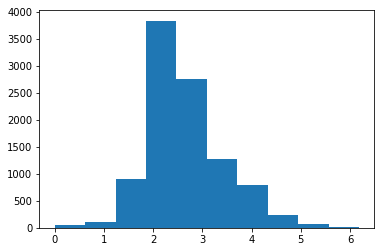

In [29]:
plt.hist(pow(data_pro_sub['Average Medicare Difference'], 1/6))

#### Average Medicare Allowed Amount

(array([1.000e+00, 3.400e+01, 8.000e+00, 4.000e+01, 3.630e+02, 2.293e+03,
        5.125e+03, 1.501e+03, 5.960e+02, 6.800e+01]),
 array([-3.91202301, -2.53018528, -1.14834756,  0.23349017,  1.61532789,
         2.99716562,  4.37900334,  5.76084107,  7.14267879,  8.52451652,
         9.90635424]),
 <a list of 10 Patch objects>)

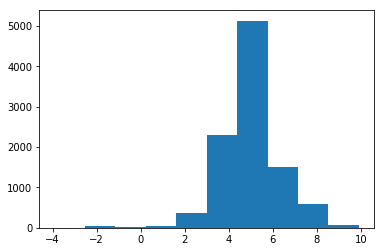

In [30]:
# log transformation of Average Medicare Allowed Amount
plt.hist(np.log(data_pro_sub['Average Medicare Allowed Amount']))

In [31]:
# copy df
data_pro_sub_copy = data_pro_sub.copy()
# log transformation of 
data_pro_sub_copy['Log Average Medicare Allowed Amount'] = np.log(data_pro_sub['Average Medicare Allowed Amount'])

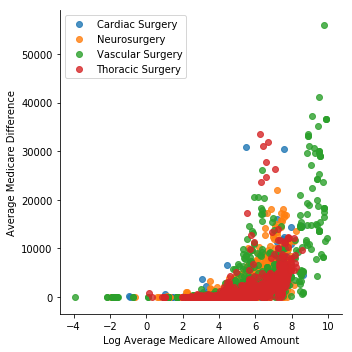

In [32]:
sns.lmplot(x = 'Log Average Medicare Allowed Amount', y='Average Medicare Difference', data = data_pro_sub_copy, fit_reg = False, hue = 'Provider Type', legend = False)
plt.legend(loc='upper left')

We could see there's more variations in vascular surgery. With more allowed average medicare amoumt, there's a increasing trend in variations in average medicare difference and the amount of average medicare difference.  

Now, I would like to see if there's a difference in entity type of the provider:

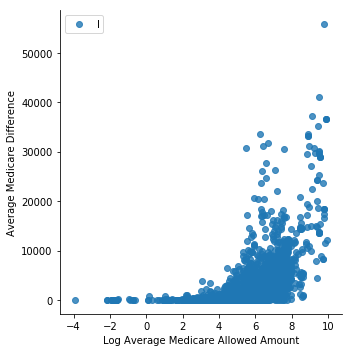

In [33]:
sns.lmplot(x = 'Log Average Medicare Allowed Amount', y='Average Medicare Difference', data = data_pro_sub_copy, fit_reg = False, hue = 'Entity Type of the Provider', legend = False)
plt.legend(loc='upper left')

the result showed that based on these four provider types, all the provider registered as individuals.  

#### Average Medicare Payment Amount

(array([1.000e+00, 3.400e+01, 8.000e+00, 4.000e+01, 3.700e+02, 2.452e+03,
        4.966e+03, 1.494e+03, 5.960e+02, 6.800e+01]),
 array([-4.15197368e+00, -2.77047552e+00, -1.38897737e+00, -7.47922062e-03,
         1.37401893e+00,  2.75551708e+00,  4.13701524e+00,  5.51851339e+00,
         6.90001154e+00,  8.28150969e+00,  9.66300784e+00]),
 <a list of 10 Patch objects>)

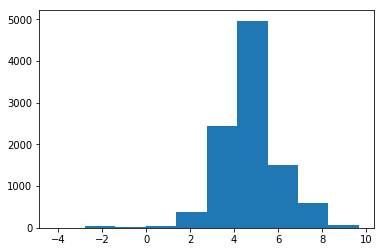

In [34]:
plt.hist(np.log(data_pro_sub['Average Medicare Payment Amount']))

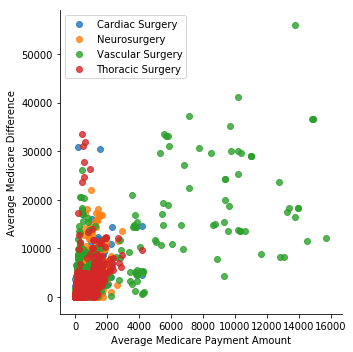

In [35]:
# scatter plot 
sns.lmplot(x = 'Average Medicare Payment Amount', y='Average Medicare Difference', data = data_pro_sub, fit_reg = False, hue = 'Provider Type', legend = False)
plt.legend(loc='upper left')

The scatter plot showed that vascular surgery varied the most in average medicare payment amount that medicare covered after coinsurance amount deducted compared to other surgery, and it can be visualized that there's slightly positive correlation between average medicare payment amount and average medicare difference. 